## <center>Predict whether the Employee of an Organization should get Promotion or Not?</center>

&nbsp;

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
    * They first identify a set of employees based on recommendations/ past performance.
    * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical
    * At the end of the program, based on various factors such as training performance, an employee gets the promotion

![image](https://corehr.files.wordpress.com/2013/02/wrong-promotion1.jpg?w=290)

<a id="agenda"></a>
## Agenda for Today

   * [**Importing the Dataset**](#importing)
   * [**Reading the Dataset**](#reading)
   * [**Examining the Dataset**](#examining)
   * [**Data Profiling**](#profiling)
   * [**Descriptive Statistics**](#stats)
   * [**Treatment of Missing Values**](#miss)
   * [**Univariate Analysis**](#uni)
   * [**Bivariate Analysis**](#bi)
    
* **Learning Outcomes**
    * You will be able to read any kind of csv data into a Jupyter Notebook after the session
    * You will be able to able to Examine Datasets using various techniques
    * You will have knowledge about Descriptive Statistics
    * You will know how treat missing values in real life scenarios.
    * You will be able to perform Data Analysis and Visualizations to solve many Decision Making Problems.
    * You will be able to Distinguish, and Understand Outliers.
    * You will also understand how to perform Univariate and Bivariate Analysis
    
    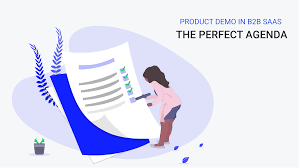

<a id = "importing"></a>
[Go back to the Agenda](#agenda)

## Importing all the Required Libraries

* We Import Numpy, Pandas, Matplot, and Seaborn for Data Analysis and Visualizations
* We import ipywidgets, Sweetviz, ppscore for Exploratory Data Analysis
* We Import Sklearn, Imblearn for Machine Learning Modelling

In [1]:
# lets import all the required libraries

# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for exploratory data analysis
import sweetviz
import ppscore as pps

# for machine learning
import sklearn
import imblearn

Using TensorFlow backend.


<a id = "reading"></a>
[Go back to the Agenda](#agenda)

## Reading the Dataset

* Here, we are having two datasets, i.e., Training and Testing Datasets
* We will read both the datasets 
* Training Datasets is used to train the Machine learning Models
* After learning the patterns from the Testing Datasets, We have to predict the Target Variable.

In [3]:
# reading the datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<a id = "examining"></a>
[Go back to the Agenda](#agenda)

## Examining the Data

* This is an Important Step in Data Science and Machine Learning to ensure about the columns, and rows present.
* First, we will check the shape of the dataset
* Second, we will check the head, tail, and sample of the datasets
* Third, we will check the Data Description
* Then, we will check the Data Types of the columns present in the data.
* Atlast, we will check the Target Class Balance

In [3]:
# lets check the shape of the train and test datasets
print("Shape of the Training Data :", train.shape)
print("Shape of the Test Data :", test.shape)

Shape of the Training Data : (54808, 14)
Shape of the Test Data : (23490, 13)


In [4]:
# lets check the head of the dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
# lets check the head of the test data
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
# lets also check the tail of the test data
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [ ]:
# lets also check the tail of the test data
test.tail()

## <center>Data Description</center>

<table>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>employee_id</td>
        <td>Unique ID for employee<td>
    </tr>
    <tr>
        <td>department</td>
        <td>Department of employee</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>KPIs_met >80%</td>
        <td>if Percent of KPIs(Key performance Indicators) >80% then 1 else 0</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

In [6]:
# lets check the datatype of the columns in the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


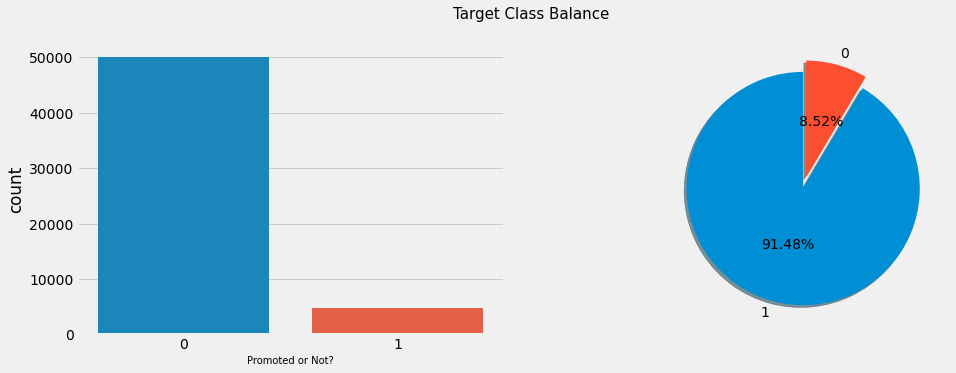

In [5]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

In [ ]:
# Lets make a report using sweetviz for complete EDA
my_report = sweetviz.compare([train, "Train"], [test, "Test"], "is_promoted")
my_report.show_html("Report.html")

<a id = "stats"></a>
[Go back to the Agenda](#agenda)

## Descriptive Statistics

* Descriptive Statistics is one of the most Important Step to Understand the Data and take out Insights
* First we will the Descriptive Statistics for the Numerical Columns
* for Numerical Columns we check for stats such as Max, Min, Mean, count, standard deviation, 25 percentile, 50 percentile, and 75 percentile.
* Then we will check for the Descriptive Statistics for Categorical Columns
* for Categorical Columns we check for stats such as count, frequency, top, and unique elements.

In [7]:
# lets check descriptive statistics for numerical columns
train.iloc[:,1:].describe().style.background_gradient(cmap = 'copper')

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808,54808,50684,54808,54808,54808,54808,54808
mean,1.25301,34.8039,3.32926,5.86551,0.351974,0.0231718,63.3868,0.08517
std,0.609264,7.66017,1.25999,4.26509,0.47759,0.15045,13.3716,0.279137
min,1,20,1,1,0,0,39,0
25%,1,29,3,3,0,0,51,0
50%,1,33,3,5,0,0,60,0
75%,1,39,4,7,1,0,76,0
max,10,60,5,37,1,1,99,1


In [8]:
# lets check descriptive statistics for categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [9]:
# Lets make an interactive function to check the statistics of these numerical columns at a time

@interact
def check(column = list(train.select_dtypes('number').columns[1:8])):
    print("Maximum Value :", train[column].max())
    print("Minimum Value :", train[column].min())
    print("Mean : {0:.2f}".format(train[column].mean()))
    print("Median :", train[column].median())
    print("Standard Deviation :  {0:.2f}".format(train[column].std()))

interactive(children=(Dropdown(description='column', options=('no_of_trainings', 'age', 'previous_year_rating'…

<a id = "miss"></a>
[Go back to the Agenda](#agenda)

## Treatment of Missing Values

* Treatment of Missing Values is very Important Step in any Machine Learning Model Creation 
* Missing Values can be cause due to varios reasons such as the filling incomplete forms, values not available, etc
* There are so many types of Missing Values such as 
     * Missing values at Random
     * Missing values at not Random
     * Missing Values at Completely Random
* What can we do to Impute or Treat Missing values to make a Good Machine Learning Model
    * We can use Business Logic to Impute the Missing Values
    * We can use Statistical Methods such as Mean, Median, and Mode.
    * We can use ML Techniques to impute the Missing values
    * We can delete the Missing values, when the Missing values percentage is very High.
    
* When to use Mean, and when to use Median?
    * We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
    * We use Median, when we have outliers in the dataset for the Numerical Variables.
    * We use Mode, When we have Categorical Variables.

In [11]:
# missing values in training data set

# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

# lets check the head
train_missing_data.style.bar(color = ['gold'])

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0,0,0
age,0,0,0,0
avg_training_score,0,0,0,0
awards_won?,0,0,0,0
department,0,0,0,0
education,2409,4.4,1034,4.4
employee_id,0,0,0,0
gender,0,0,0,0
is_promoted,0,0,nan,nan
length_of_service,0,0,0,0


In [12]:
# checking datatype of columns in the data
train.dtypes[train.isnull().any()]

education                object
previous_year_rating    float64
dtype: object

In [13]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [14]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


<a id = "uni"></a>
[Go back to the Agenda](#agenda)

## Univariate Analysis

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

* This is an Essential step, to understand the variables present in the dataset one by one.
* First, we will check the Univariate Analysis for Numerical Columns to check for Outliers by using Box plots.
* Then, we will use Distribution plots to check the distribution of the Numerical Columns in the Dataset.
* After that we will check the Univariate Analysis for Categorical Columns using Pie charts, and Count plots.
* We Use Pie charts, when we have very few categories in the categorical column, and we use count plots we have more categorises in the dataset.

In [15]:
# Lets first analyze the Numberical Columns
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


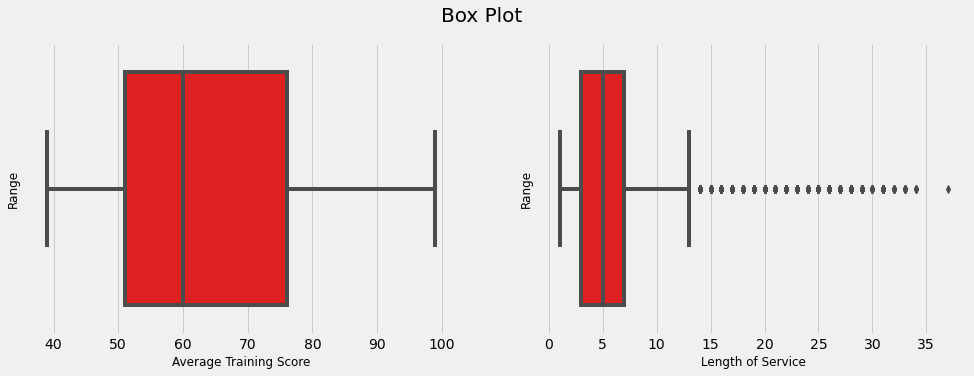

In [16]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

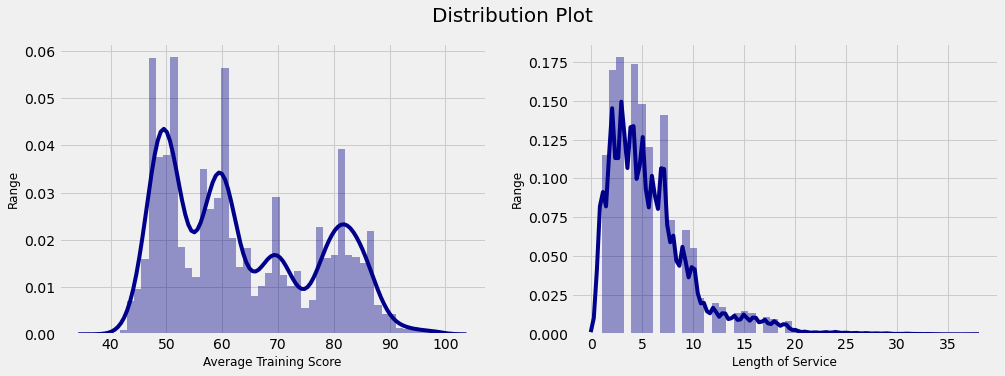

In [17]:
# Lets check the distribution for the columns for which we suspect for the outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Distribution plot for Average training score
plt.subplot(1, 2, 1)
sns.distplot(train['avg_training_score'], color = 'darkblue')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Distribution plot for Length of Service
plt.subplot(1, 2, 2)
sns.distplot(train['length_of_service'], color = 'darkblue')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Distribution Plot', fontsize = 20)
plt.show()

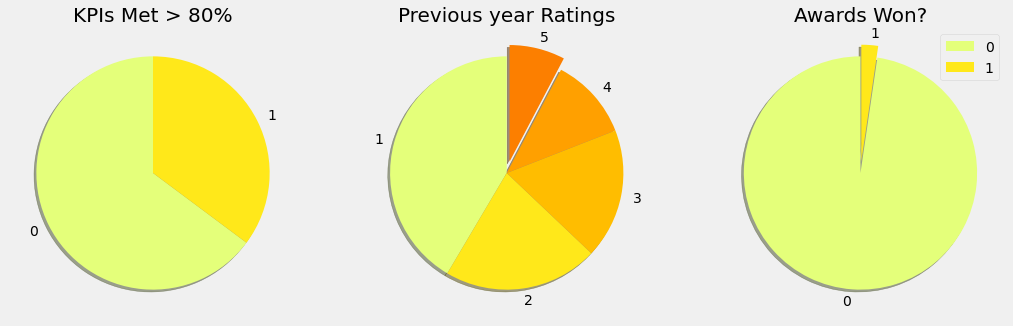

In [18]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

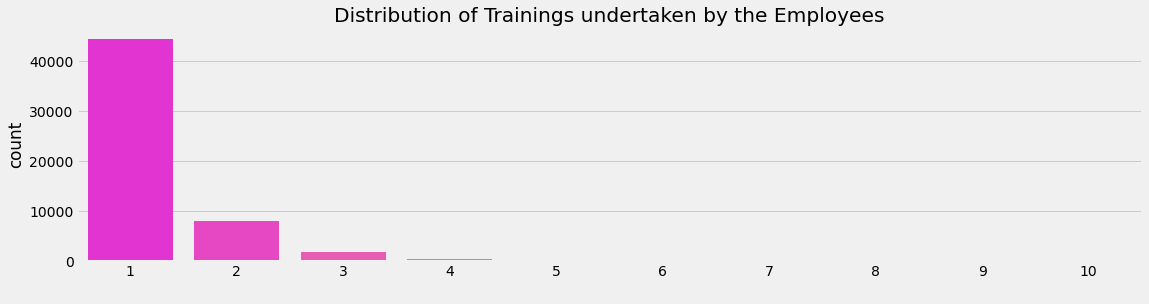

In [19]:
# lets check the distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

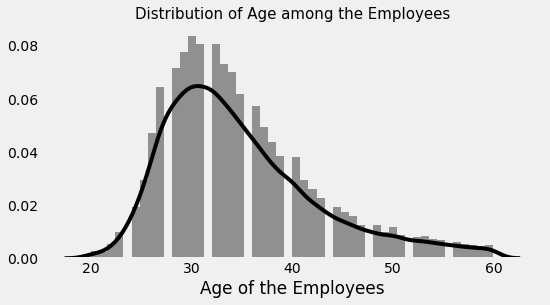

In [20]:
# lets check the Age of the Employees

plt.rcParams['figure.figsize'] = (8, 4)
sns.distplot(train['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

In [21]:
# lets now check the columns which are categorical
train.select_dtypes('object').head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


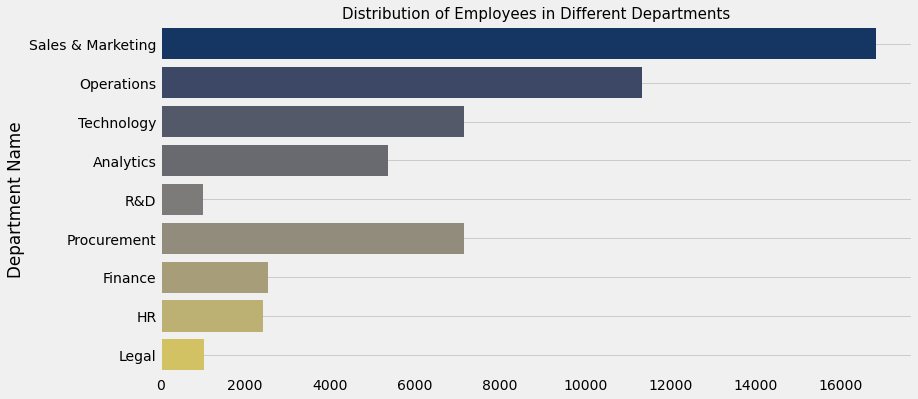

In [32]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()
plt.show()

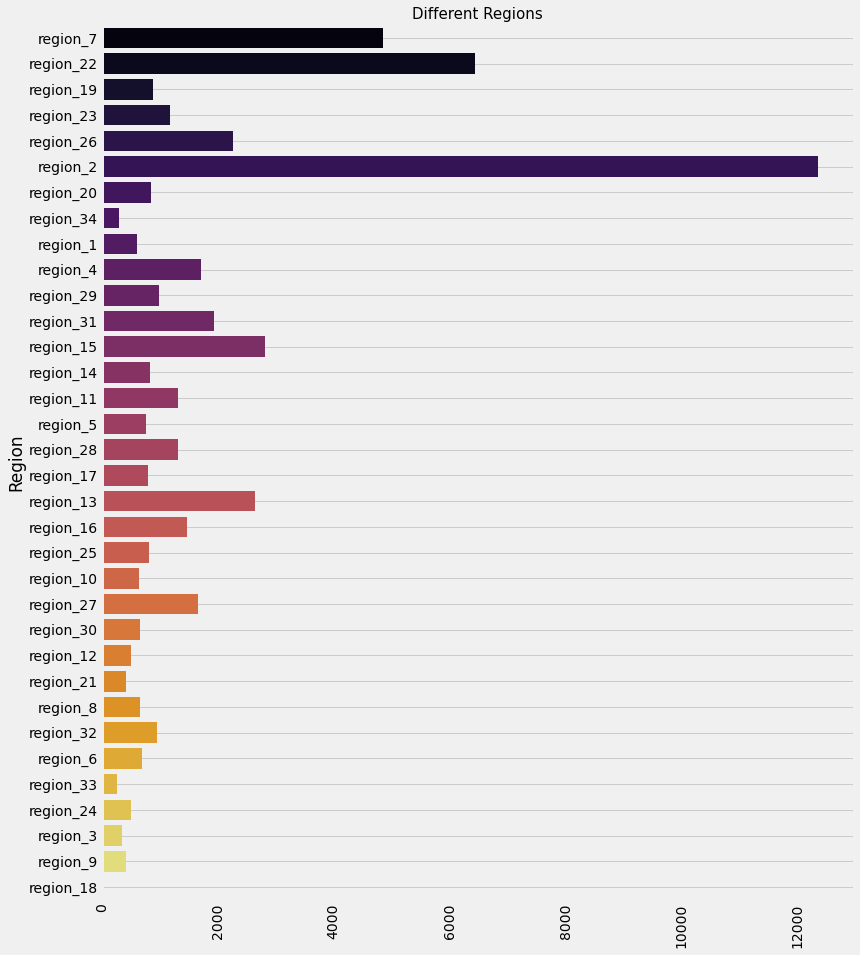

In [33]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

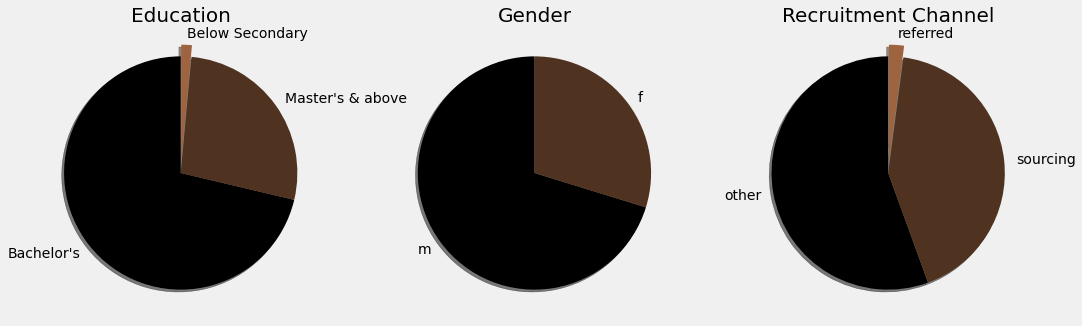

In [34]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

In [35]:
# interactive function for plotting univariate charts for categorical data

plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def check(column = list(train.select_dtypes('object').columns),
          palette = ['cividis','copper','spring','Reds','Blues']):
    sns.countplot(train[column], palette = palette)
   
    plt.show()

interactive(children=(Dropdown(description='column', options=('department', 'region', 'education', 'gender', '…

<a id = "bi"></a>
[Go back to the Agenda](#agenda)

## Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

* Types of Bivariate Analysis
    * Categorical vs Categorical 
    * Categorical vs Numerical
    * Numerical vs Numerical
    
* First, we will perform Categorical vs Categorical Analysis using Stacked and Grouped Bar Charts with the help of crosstab function.
* Second, we will perform Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, etc
* Atlast, we will perform Numerical vs Numerical Analysis using Scatter plots.

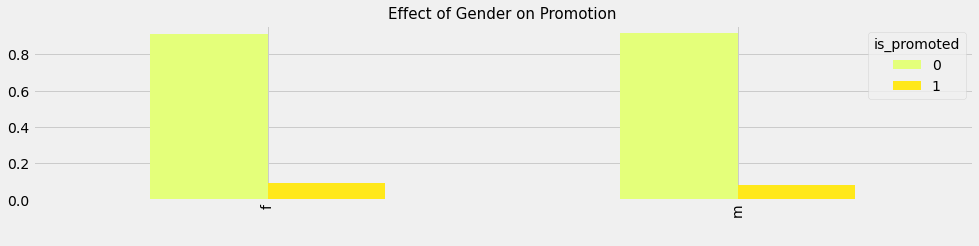

In [36]:
# Lets compare the Gender Gap in the promotion

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, colors = colors)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

As we have already seen that the Females are in Minority, but when it comes to Promotion, they are competing with their Men Counterparts neck-to-neck. That's a great Inference.

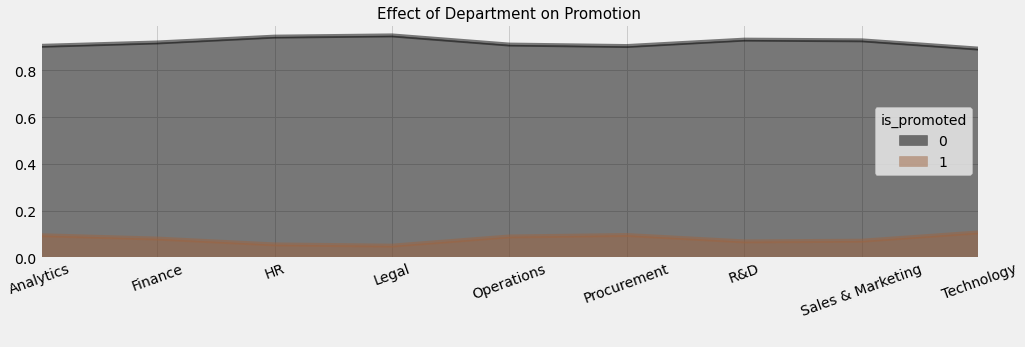

In [37]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False, colors = colors)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

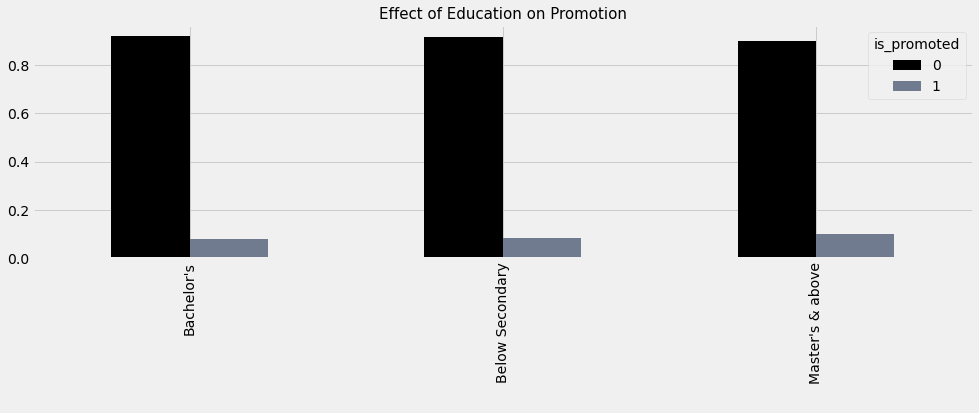

In [38]:
# lets compare the effect of Education and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['education'], train['is_promoted'])
colors = plt.cm.bone(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, colors = colors)
plt.title('Effect of Education on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

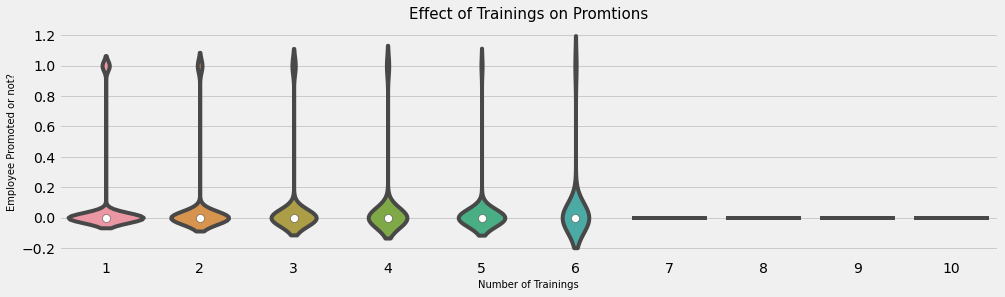

In [39]:
# checking the effect of number of trainings on promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.violinplot(train['no_of_trainings'], train['is_promoted'])
plt.title('Effect of Trainings on Promtions', fontsize = 15)
plt.xlabel('Number of Trainings', fontsize = 10)
plt.ylabel('Employee Promoted or not?', fontsize = 10)
plt.show()

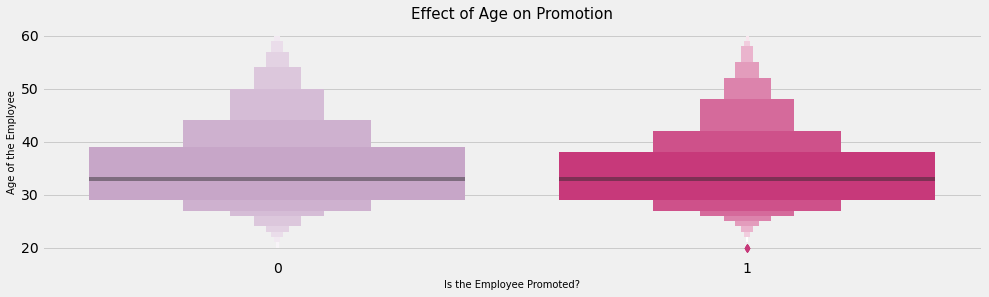

In [40]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

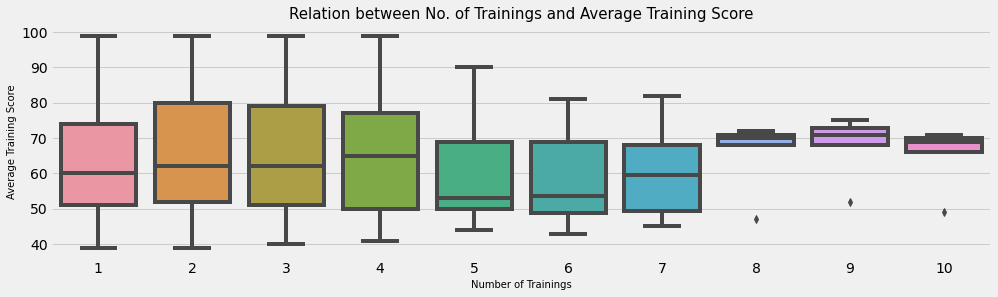

In [41]:
# lets check relation between number of trainings and average training score

plt.rcParams['figure.figsize'] = (15,4)
sns.boxplot(train['no_of_trainings'], train['avg_training_score'])
plt.title('Relation between No. of Trainings and Average Training Score', fontsize = 15)
plt.xlabel('Number of Trainings', fontsize = 10)
plt.ylabel('Average Training Score', fontsize = 10)
plt.show()

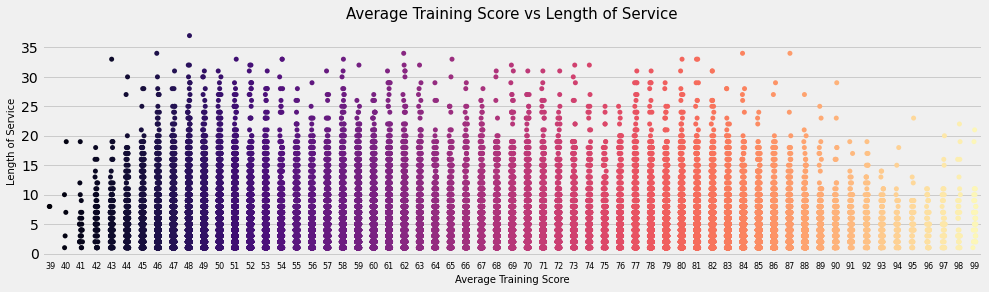

In [44]:
# lets check the relation between the length of service and the average training score

plt.rcParams['figure.figsize'] = (15,4)
sns.stripplot(train['avg_training_score'], train['length_of_service'], palette = 'magma')
plt.title('Average Training Score vs Length of Service', fontsize = 15)
plt.xlabel('Average Training Score', fontsize = 10)
plt.ylabel('Length of Service', fontsize = 10)
plt.xticks(fontsize = 8)
plt.show()

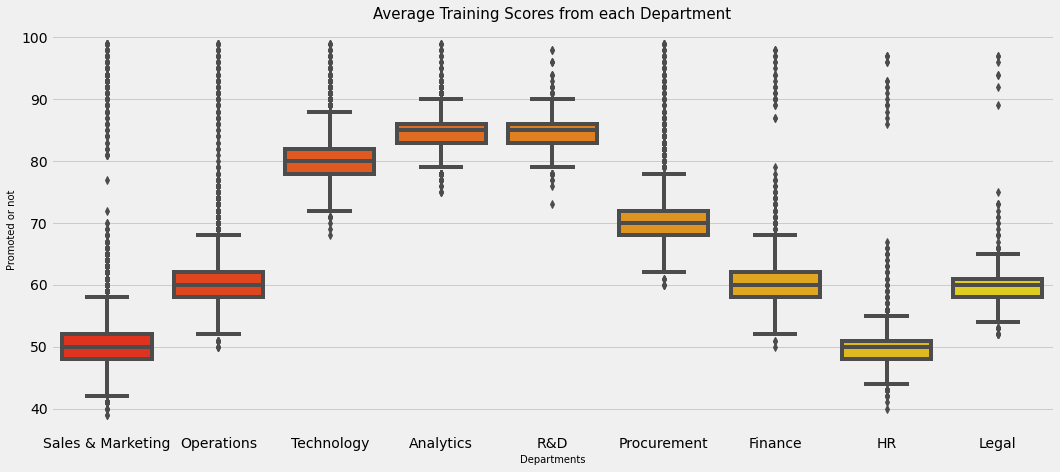

In [45]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

In [46]:
# lets make an Interactive Function for Bivariate Analysis

plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def bivariate_plot(column1 = list(train.select_dtypes('object').columns),
                   column2 = list(train.select_dtypes('number').columns[1:])):
    sns.boxplot(train[column1], train[column2])

interactive(children=(Dropdown(description='column1', options=('department', 'region', 'education', 'gender', …

In [47]:
# lets make an Interactive Function for Bivariate Analysis

plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def bivariate_plot(column1 = list(train.select_dtypes('object').columns),
                   column2 = list(train.select_dtypes('number').columns[1:])):
    sns.boxenplot(train[column1], train[column2])

interactive(children=(Dropdown(description='column1', options=('department', 'region', 'education', 'gender', …


**I Hope, you are pretty excited what we are going to learn in the Next session. Here are the Topics to be covered in the Next Session.**
* Multivariate Analysis
* Feature Engineering
* Grouping Operations
* Dealing with Categorical Data
* Resampling the Data
* Splitting the Data
* Feature Scaling
